In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [11]:
SRC_DIR = '../Dataset/ArASL_Database_54K_Final'

In [12]:
classes = [d for d in os.listdir(SRC_DIR) if os.path.isdir(os.path.join(SRC_DIR, d))]
print(f'Number of characters (volumes): {len(classes)}')

for c in sorted(classes):
    folder = os.path.join(SRC_DIR, c)
    n = len([img for img in os.listdir(folder) if img.lower().endswith(('.png', '.jpg', '.jpeg'))])
    print(f'character: {c:10} ==> number of pictures: {n}')

Number of characters (volumes): 32
character: ain        ==> number of pictures: 2114
character: al         ==> number of pictures: 1343
character: aleff      ==> number of pictures: 1672
character: bb         ==> number of pictures: 1791
character: dal        ==> number of pictures: 1634
character: dha        ==> number of pictures: 1723
character: dhad       ==> number of pictures: 1670
character: fa         ==> number of pictures: 1955
character: gaaf       ==> number of pictures: 1705
character: ghain      ==> number of pictures: 1977
character: ha         ==> number of pictures: 1592
character: haa        ==> number of pictures: 1526
character: jeem       ==> number of pictures: 1552
character: kaaf       ==> number of pictures: 1774
character: khaa       ==> number of pictures: 1607
character: la         ==> number of pictures: 1746
character: laam       ==> number of pictures: 1832
character: meem       ==> number of pictures: 1765
character: nun        ==> number of pictures: 1

In [14]:
!pip3 install opencv-python

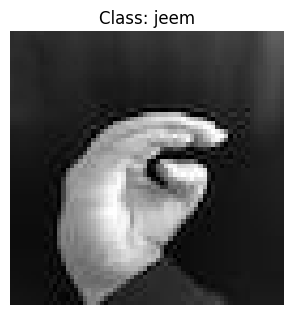

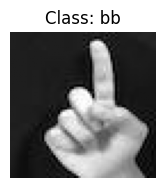

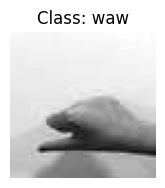

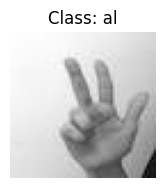

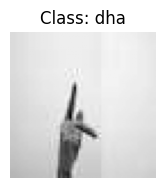

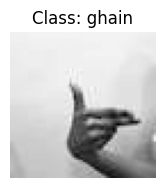

In [15]:

# اعرض عينة من البيانات من كل فئة
plt.figure(figsize=(12,8))
for i,cls in enumerate(classes[:6]): # اول ست فئات
    class_path=os.path.join(SRC_DIR, cls)
    img_name= os.listdir(class_path)[0] 
    img_path=os.path.join(class_path, img_name)

    img=cv2.imread(img_path , cv2.IMREAD_GRAYSCALE)
    plt.subplot(2 , 3,i+1)
    plt.imshow(img , cmap="gray")
    plt.title(f"Class: {cls}")
    plt.axis("off")
    plt.show()

In [17]:
mapping={"ain" : "ع",
"al" : "ال" ,
"aleff" : "ا" ,
"bb" : "ب" ,
"dal" : "د" ,
"dha" : "ظ" ,
"dhad" : "ض" ,
"fa" : "ف" ,
"gaaf" : "ق" ,
"ghain" : "غ" ,
"ha" : "ه" ,
"haa" : "ح" ,
"jeem" : "ج" ,
"kaaf" : "ك" ,
"khaa" : "خ" ,
"la" : "لا" ,
"laam" : "ل" ,
"meem" : "م" ,
"nun" : "ن" ,
"ra" : "ر" ,
"saad" : "ص" ,
"seen" : "س" ,
"sheen" : "ش" ,
"ta" : "ط" ,
"taa" : "ت" ,
"thaa" : "ث" ,
"thal" : "ذ" ,
"toot" : "ة" ,
"waw" : "و" ,
"ya" : "ئ" ,
"yaa" : "ي",
"zay" : "ز"
    
}

In [18]:
X= []
y= []

for folder in os.listdir(SRC_DIR):
    folder_path=os.path.join(SRC_DIR, folder)


    label_ar = mapping.get(folder, folder) # arabic label

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)


        img_resized=cv2.resize(img, (64 , 64) ) #resize
        img_normalised=img_resized.astype("float32") /255.0 #

        img_expanded=np.expand_dims(img_normalised, axis=-1) #adding channel

        X.append(img_expanded)
        y.append(label_ar) # link every image with arabic label

#convert list to array after adding all images
X = np.array(X)
y = np.array(y)

In [19]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y) #convert every letter to digit

# dataframe to display each letter with its encode
df = pd.DataFrame({
    "letter-coding": encoder.classes_,
    
})

print(df)

   letter-coding
0              ئ
1              ا
2             ال
3              ب
4              ة
5              ت
6              ث
7              ج
8              ح
9              خ
10             د
11             ذ
12             ر
13             ز
14             س
15             ش
16             ص
17             ض
18             ط
19             ظ
20             ع
21             غ
22             ف
23             ق
24             ك
25             ل
26            لا
27             م
28             ن
29             ه
30             و
31             ي
